# explore_a1_don_melinda_20250609

Notebook for exploring the changes that we discussed in meeting on 2025-06-09

In [1]:
# Imports
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [2]:
# Figure export path
fg_dir = os.path.join('..', '..', 'figures')

In [4]:
# Load data
a1_dir = os.path.join('..', '..', 'export', 'final-upload-data', 'spectral_albedo_2024', 'a1')
filepaths = glob.glob(os.path.join(a1_dir, '*.a1.h5'))

ls_a1 = []
for a1_path in filepaths:
    ls_a1.append(pd.read_hdf(a1_path, mode='r'))

df_a1 = pd.concat(ls_a1, copy=False)

In [ ]:
## 1. Examine incident variability in all wavelengths

In [10]:
# Add date to index
df_a1_dt = df_a1.copy(deep=True)
df_a1_dt['date_akdt'] = pd.to_datetime(df_a1.index.get_level_values('timestamp_akdt').date)
df_a1_dt.set_index('date_akdt', append=True, inplace=True)

In [14]:
df_grouped = df_a1_dt.query('variable == "incident_solar_counts"').reset_index('timestamp_akdt').groupby(
    level=['site', 'date_akdt', 'wavelength'], sort=False)

In [11]:
df_a1.memory_usage(deep=True)

Index    103221739
value     82439784
dtype: int64

In [24]:
chg_threshold = 0.15

ls_inc_thrsh = []

for name, group in df_grouped:
    # Sort by increasing time (should be easy)
    group.sort_values('timestamp_akdt', inplace=True, kind='quick', ignore_index=False)
    # Create proportional difference column
    group['value'] = np.group['value'].diff(periods=-1).abs()/ group['value']
    df_temp = group[group['value'] > chg_threshold]
    if df_temp.size > 0:
        ls_inc_thrsh.append(df_temp)

In [139]:
# Combine
df_inc_filt = pd.concat(ls_inc_thrsh, copy=True)

In [140]:
df_inc_filt

timestamp_akdt  \
site location position repetition wavelength variable              date_akdt                              
arm  line     35       1.0        1357.0     incident_solar_counts 2024-04-19 2024-04-19 14:20:08-08:00   
              70       1.0        1357.0     incident_solar_counts 2024-04-19 2024-04-19 14:27:37-08:00   
              35       1.0        1358.0     incident_solar_counts 2024-04-19 2024-04-19 14:20:08-08:00   
              40       1.0        1358.0     incident_solar_counts 2024-04-19 2024-04-19 14:21:12-08:00   
              70       1.0        1358.0     incident_solar_counts 2024-04-19 2024-04-19 14:27:37-08:00   
...                                                                                                 ...   
ice  line     55       1.0        2500.0     incident_solar_counts 2024-06-15 2024-06-15 11:54:21-08:00   
              45       1.0        2500.0     incident_solar_counts 2024-06-15 2024-06-15 11:55:53-08:00   
              40       1.0        2500.0     incident_solar_counts 2024-06-15 2024-06-15 11:56:31-08:00   
              10       1.0        2500.0     incident_solar_counts 2024-06-15 2024-06-15 12:02:19-08:00   
              5        1.0        2500.0     incident_solar_counts 2024-06-15 2024-06-15 12:02:57-08:00   

                                                                                  value  
site location position repetition wavelength variable              date_akdt             
arm  line     35       1.0        1357.0     incident_solar_counts 2024-04-19  0.162279  
              70       1.0        1357.0     incident_solar_counts 2024-04-19  0.183409  
              35       1.0        1358.0     incident_solar_counts 2024-04-19  0.186283  
              40       1.0        1358.0     incident_solar_counts 2024-04-19  0.152069  
              70       1.0        1358.0     incident_solar_counts 2024-04-19  0.174429  
...                                                                                 ...  
ice  line     55       1.0        2500.0     incident_solar_counts 2024-06-15  0.238335  
              45       1.0        2500.0     incident_solar_counts 2024-06-15  0.171495  
              40       1.0        2500.0     incident_solar_counts 2024-06-15  0.641181  
              10       1.0        2500.0     incident_solar_counts 2024-06-15  0.315408  
              5        1.0        2500.0     incident_solar_counts 2024-06-15  0.239457  

[271237 rows x 2 columns]

In [30]:
df_inc_filt.size / df_a1.size

0.05264196228364693

In [142]:
df_inc_filt.reset_index(['variable', 'date_akdt'], inplace=True)
df_inc_filt.drop(columns='date_akdt', inplace=True)
df_inc_filt['variable'] = 'asd_quality_flag'


In [143]:
df_inc_filt.set_index(['timestamp_akdt', 'variable'], append=True, inplace=True)

In [144]:
df_inc_filt = df_inc_filt.reorder_levels(
        ['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'wavelength', 'variable'])

In [146]:
df_a1.loc[[df_inc_filt.index], 'value']

KeyboardInterrupt: 

In [136]:
df_a1

,,,,,,,value
timestamp_akdt,site,location,position,repetition,wavelength,variable,
2024-04-19 14:10:54-08:00,arm,line,0,1.0,350.0,incident_solar_counts,4039.254489
2024-04-19 14:11:20-08:00,arm,line,0,1.0,350.0,reflected_solar_counts,3706.906630
2024-04-19 14:12:20-08:00,arm,line,5,1.0,350.0,incident_solar_counts,4074.302244
2024-04-19 14:12:50-08:00,arm,line,5,1.0,350.0,reflected_solar_counts,3825.859000
2024-04-19 14:13:35-08:00,arm,line,10,1.0,350.0,incident_solar_counts,4086.215718
...,...,...,...,...,...,...,...
2024-06-15 12:00:46-08:00,ice,line,20,1.0,NaN,asd_time_diff_s,-14.000000
2024-06-15 12:01:42-08:00,ice,line,15,1.0,NaN,asd_time_diff_s,-10.000000
2024-06-15 12:02:31-08:00,ice,line,10,1.0,NaN,asd_time_diff_s,-12.000000


In [147]:
df_a1['value'][df_inc_filt.index]

KeyError: "None of [MultiIndex([('2024-04-19 14:20:08-08:00', 'arm', 'line',  35, 1.0, ...),\n            ('2024-04-19 14:27:37-08:00', 'arm', 'line',  70, 1.0, ...),\n            ('2024-04-19 14:20:08-08:00', 'arm', 'line',  35, 1.0, ...),\n            ('2024-04-19 14:21:12-08:00', 'arm', 'line',  40, 1.0, ...),\n            ('2024-04-19 14:27:37-08:00', 'arm', 'line',  70, 1.0, ...),\n            ('2024-04-19 14:36:43-08:00', 'arm', 'line', 110, 1.0, ...),\n            ('2024-04-19 14:37:45-08:00', 'arm', 'line', 115, 1.0, ...),\n            ('2024-04-19 14:43:53-08:00', 'arm', 'line', 145, 1.0, ...),\n            ('2024-04-19 14:20:08-08:00', 'arm', 'line',  35, 1.0, ...),\n            ('2024-04-19 14:21:12-08:00', 'arm', 'line',  40, 1.0, ...),\n            ...\n            ('2024-06-15 11:48:24-08:00', 'ice', 'line', 100, 1.0, ...),\n            ('2024-06-15 11:48:59-08:00', 'ice', 'line',  95, 1.0, ...),\n            ('2024-06-15 11:49:37-08:00', 'ice', 'line',  90, 1.0, ...),\n            ('2024-06-15 11:51:05-08:00', 'ice', 'line',  80, 1.0, ...),\n            ('2024-06-15 11:53:41-08:00', 'ice', 'line',  60, 1.0, ...),\n            ('2024-06-15 11:54:21-08:00', 'ice', 'line',  55, 1.0, ...),\n            ('2024-06-15 11:55:53-08:00', 'ice', 'line',  45, 1.0, ...),\n            ('2024-06-15 11:56:31-08:00', 'ice', 'line',  40, 1.0, ...),\n            ('2024-06-15 12:02:19-08:00', 'ice', 'line',  10, 1.0, ...),\n            ('2024-06-15 12:02:57-08:00', 'ice', 'line',   5, 1.0, ...)],\n           names=['timestamp_akdt', 'site', 'location', 'position', 'repetition', 'wavelength', 'variable'], length=271237)] are in the [index]"

In [137]:
df_inc_filt

,,,,,,,value
timestamp_akdt,site,location,position,repetition,wavelength,variable,
2024-04-19 14:20:08-08:00,arm,line,35,1.0,1357.0,asd_quality_flag,0.162279
2024-04-19 14:27:37-08:00,arm,line,70,1.0,1357.0,asd_quality_flag,0.183409
2024-04-19 14:20:08-08:00,arm,line,35,1.0,1358.0,asd_quality_flag,0.186283
2024-04-19 14:21:12-08:00,arm,line,40,1.0,1358.0,asd_quality_flag,0.152069
2024-04-19 14:27:37-08:00,arm,line,70,1.0,1358.0,asd_quality_flag,0.174429
...,...,...,...,...,...,...,...
2024-06-15 11:54:21-08:00,ice,line,55,1.0,2500.0,asd_quality_flag,0.238335
2024-06-15 11:55:53-08:00,ice,line,45,1.0,2500.0,asd_quality_flag,0.171495
2024-06-15 11:56:31-08:00,ice,line,40,1.0,2500.0,asd_quality_flag,0.641181


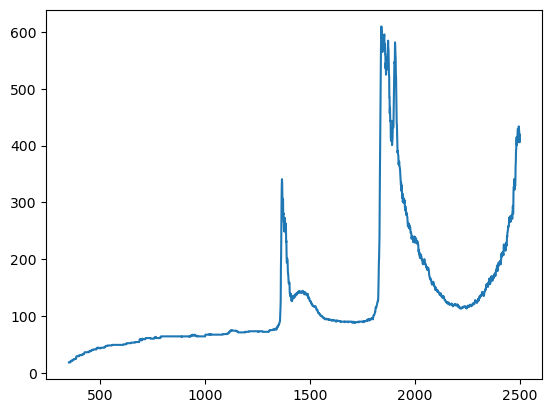

In [36]:
wvs, cts = np.unique(df_inc_filt.index.get_level_values('wavelength').values, return_counts=True)

plt.plot(wvs, cts)

(0.0, 0.3)

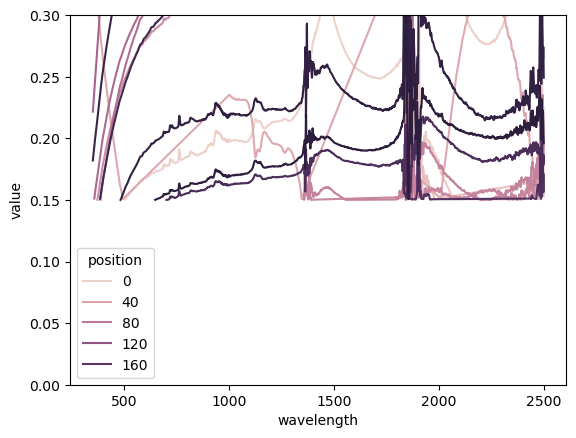

In [43]:
date = '2024-05-25' #'2024-04-19'
site = 'arm' #'arm'

sns.lineplot(x='wavelength', y='value', hue='position', 
             data=df_inc_filt.query('date_akdt == @date & site == @site'))
plt.ylim([0, 0.3])

## 2. Explore irradiance cutoffs

In [45]:
#df_a1 = df_a1.reset_index('date_akdt', drop=True)

In [46]:
df_a1

,,,,,,,value
timestamp_akdt,site,location,position,repetition,wavelength,variable,
2024-04-19 14:10:54-08:00,arm,line,0,1.0,350.0,incident_solar_counts,4039.254489
2024-04-19 14:11:20-08:00,arm,line,0,1.0,350.0,reflected_solar_counts,3706.906630
2024-04-19 14:12:20-08:00,arm,line,5,1.0,350.0,incident_solar_counts,4074.302244
2024-04-19 14:12:50-08:00,arm,line,5,1.0,350.0,reflected_solar_counts,3825.859000
2024-04-19 14:13:35-08:00,arm,line,10,1.0,350.0,incident_solar_counts,4086.215718
...,...,...,...,...,...,...,...
2024-06-15 12:00:46-08:00,ice,line,20,1.0,NaN,asd_time_diff_s,-14.000000
2024-06-15 12:01:42-08:00,ice,line,15,1.0,NaN,asd_time_diff_s,-10.000000
2024-06-15 12:02:31-08:00,ice,line,10,1.0,NaN,asd_time_diff_s,-12.000000


In [48]:
# Examine clear sky arm day
day = '2024-06-12'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a1.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

Text(0.5, 0.98, 'arm:2024-06-12')

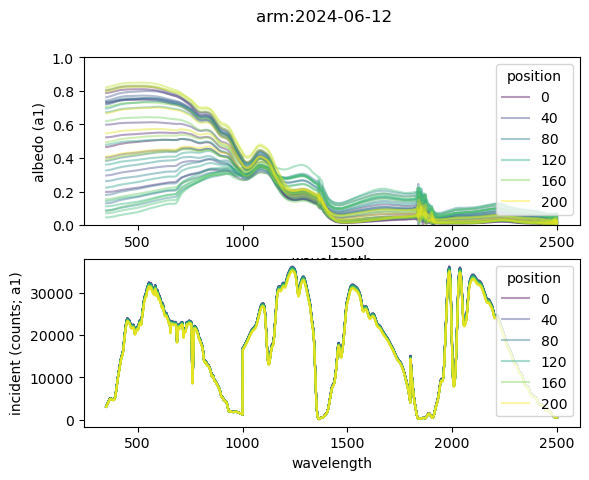

In [49]:
# Plot summary figure

f, axs = plt.subplots(2,1)

# Get filtered data for plotting albedo
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts", '+
                            '"reflected_solar_counts", "asd_quality_flag"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')
df_temp = df_temp.loc[df_temp['asd_quality_flag'] == 0.0]

sns.lineplot(data=df_temp, x='wavelength', y='albedo',
            hue='position', ax=axs[0], alpha=0.4, palette='viridis')
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('albedo (a1)')
sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_day_site.query('variable == "incident_solar_counts"'), x='wavelength', y='value',
            hue='position', ax=axs[1], alpha=0.4, palette='viridis')
axs[1].set_ylabel('incident (counts; a1)')

f.suptitle(site + ':' + day)

#f.savefig(os.path.join(fg_dir, day+'_'+site+'.a2.png'), bbox_inches='tight')

In [58]:
df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')


In [59]:
df_temp

variable               albedo  incident_solar_counts
wavelength position                                 
350.0      0         0.465345            3138.051341
           5         0.786363            3132.775686
           10        0.730608            3144.482384
           15        0.522813            3133.874552
           20        0.197902            3130.398881
...                       ...                    ...
2500.0     180       0.013016             574.632346
           185       0.014726             579.215086
           190       0.015239             570.976963
           195       0.027407             579.005407
           200      -0.007795             582.214839

[88191 rows x 2 columns]

Text(0.5, 0.98, 'arm:2024-06-12')

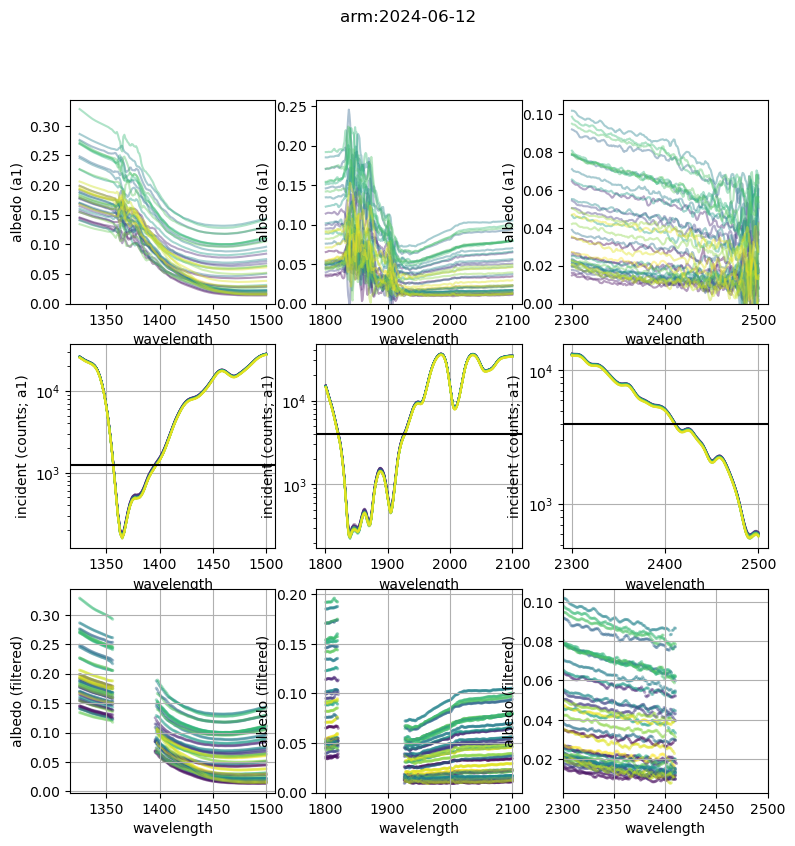

In [93]:
# Plot absorption bands only
day = '2024-06-12'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a1.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

ps = 5 #point size

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')

f, axs = plt.subplots(3, 3, figsize=(9, 9))

j = 0
wv_min = 1325
wv_max = 1500
inc_thrsh = 1250

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 1
wv_min = 1801
wv_max = 2100
inc_thrsh = 4000

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 2
wv_min = 2300
wv_max = 2500
inc_thrsh = 4000

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()
axs[2,j].set_xlim([wv_min, wv_max])

f.suptitle(site + ':' + day)

Text(0.5, 0.98, 'arm:2024-05-25')

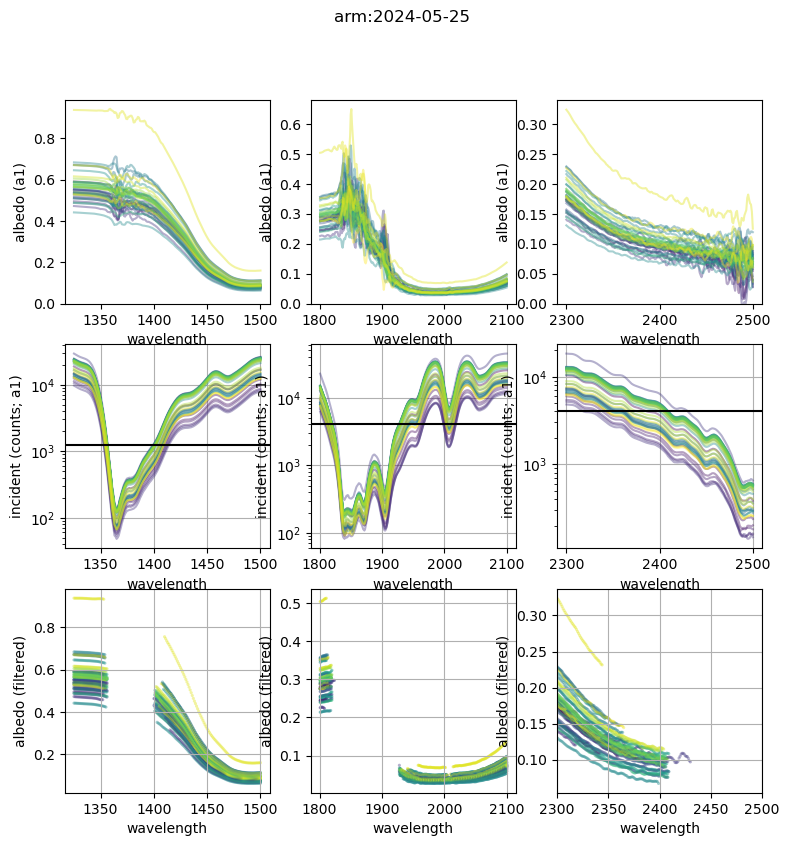

In [92]:
# Plot absorption bands only
day = '2024-05-25'
site = 'arm'

# Get data just from requested day-site
df_day_site = df_a1.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

ps = 5 #point size

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')

f, axs = plt.subplots(3, 3, figsize=(9, 9))

j = 0
wv_min = 1325
wv_max = 1500
inc_thrsh = 1250

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 1
wv_min = 1801
wv_max = 2100
inc_thrsh = 4000

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 2
wv_min = 2300
wv_max = 2500
inc_thrsh = 4000

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=inc_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['incident_solar_counts']>inc_thrsh].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()
axs[2,j].set_xlim([wv_min, wv_max])

f.suptitle(site + ':' + day)

Text(0.5, 0.98, 'arm:2024-04-19')

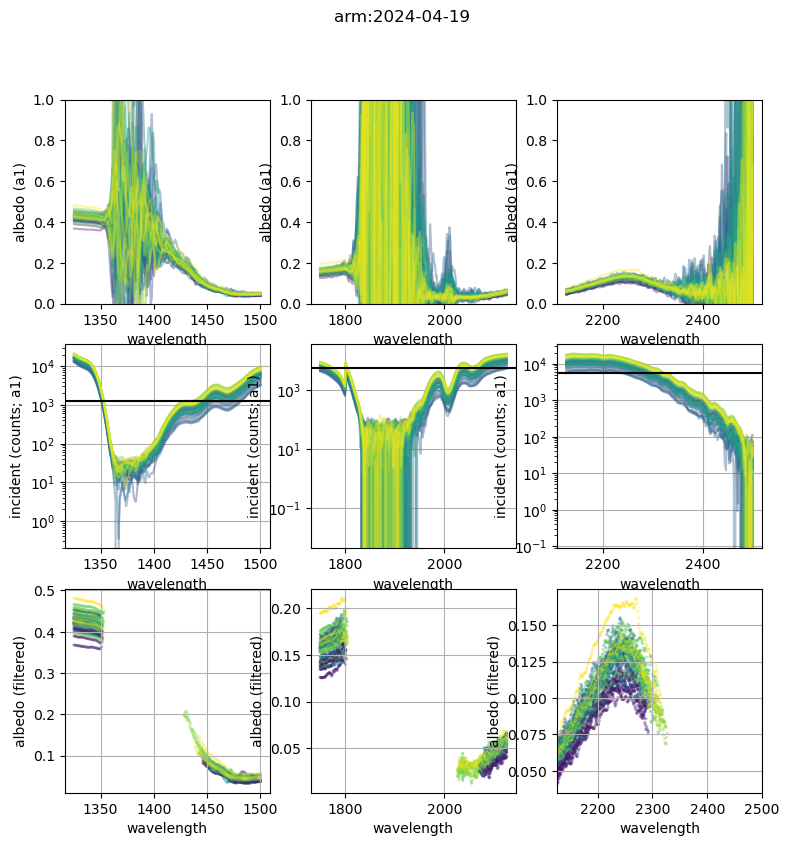

In [120]:
# Plot absorption bands only
day = '2024-04-19'
site = 'arm'

swir1_thrsh = 1250
swir2_thrsh = 5500

# Get data just from requested day-site
df_day_site = df_a1.xs((slice(day, day), site), 
                       level=('timestamp_akdt', 'site'), drop_level=False)

ps = 5 #point size

df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts"]').reset_index(
    ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
    index=['wavelength', 'position'], columns='variable', values='value')

# Add column for filter
df_temp['asd_quality_flag'] = 0.0
df_temp.loc[df_temp.eval(
    'wavelength >= 1001 & wavelength <= 1800 & incident_solar_counts <= @swir1_thrsh'), 'asd_quality_flag'] = 5.0
df_temp.loc[df_temp.eval(
    'wavelength >= 1801 & incident_solar_counts <= @swir2_thrsh'), 'asd_quality_flag'] = 5.0

f, axs = plt.subplots(3, 3, figsize=(9, 9))

j = 0
wv_min = 1325
wv_max = 1500

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=swir1_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 1
wv_min = 1750
wv_max = 2125

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=swir2_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()

j = 2
wv_min = 2126
wv_max = 2500

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
             x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
ymin, ymax = axs[0, j].get_ylim()
axs[0, j].set_ylim([0, min(1.0, ymax)])
axs[0, j].set_ylabel('albedo (a1)')
#sns.move_legend(axs[0], loc='upper right')

sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
axs[1,j].axhline(y=swir2_thrsh, c='k')
axs[1,j].set_ylabel('incident (counts; a1)')
axs[1,j].set_yscale('log')
axs[1,j].grid()

sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
    'wavelength >= @wv_min & wavelength <= @wv_max'),
             x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
               edgecolor='none', s=ps)
axs[2,j].set_ylabel('albedo (filtered)')
axs[2,j].grid()
axs[2,j].set_xlim([wv_min, wv_max])

f.suptitle(site + ':' + day)

In [115]:
swir1_thrsh = 1250
swir2_thrsh = 5500

df_temp['asd_quality_flag'] = 0.0
df_temp.loc[df_temp.eval(
    'wavelength >= 1001 & wavelength <= 1800 & incident_solar_counts <= @swir1_thrsh'), 'asd_quality_flag'] = 5.0
df_temp.loc[df_temp.eval(
    'wavelength >= 1801 & incident_solar_counts <= @swir2_thrsh'), 'asd_quality_flag'] = 5.0

In [109]:
sites = [fp[-34:-31] for fp in filepaths]
dates = [fp[-14:-10]+'-'+fp[-10:-8]+'-'+fp[-8:-6] for fp in filepaths]

In [110]:
dates

['2024-04-19',
 '2024-05-24',
 '2024-05-25',
 '2024-05-27',
 '2024-05-29',
 '2024-06-03',
 '2024-06-05',
 '2024-06-06',
 '2024-06-10',
 '2024-06-12',
 '2024-06-15',
 '2024-06-17',
 '2024-04-20',
 '2024-05-23',
 '2024-05-29',
 '2024-06-02',
 '2024-06-05',
 '2024-06-08',
 '2024-06-11',
 '2024-06-14',
 '2024-06-17',
 '2024-04-17',
 '2024-04-21',
 '2024-05-26',
 '2024-05-30',
 '2024-06-04',
 '2024-06-07',
 '2024-06-10',
 '2024-06-13',
 '2024-06-15']

In [126]:
swir1_thrsh = 1250
swir2_thrsh = 5500

for i in np.arange(len(sites)):
    day = dates[i]
    site = sites[i]
    if day == '2024-04-17':
        continue
    #if site != 'ice':
    #    continue
    print(day + ' ' + site)
    
    # Get data just from requested day-site
    df_day_site = df_a1.xs((slice(day, day), site), 
                           level=('timestamp_akdt', 'site'), drop_level=False)

    ps = 5 #point size

    df_temp = df_day_site.query('variable in ["albedo", "incident_solar_counts"]').reset_index(
        ).drop(columns=['timestamp_akdt', 'site', 'location', 'repetition']).pivot(
        index=['wavelength', 'position'], columns='variable', values='value')

    # Add column for filter
    df_temp['asd_quality_flag'] = 0.0
    df_temp.loc[df_temp.eval(
        'wavelength >= 1001 & wavelength <= 1800 & incident_solar_counts <= @swir1_thrsh'), 'asd_quality_flag'] = 5.0
    df_temp.loc[df_temp.eval(
        'wavelength >= 1801 & incident_solar_counts <= @swir2_thrsh'), 'asd_quality_flag'] = 5.0

    f, axs = plt.subplots(3, 3, figsize=(9, 9))

    j = 0
    wv_min = 1325
    wv_max = 1500

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
                 x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
    ymin, ymax = axs[0, j].get_ylim()
    axs[0, j].set_ylim([0, min(1.0, ymax)])
    axs[0, j].set_ylabel('albedo (a1)')
    #sns.move_legend(axs[0], loc='upper right')

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
    axs[1,j].axhline(y=swir1_thrsh, c='k')
    axs[1,j].set_ylabel('incident (counts; a1)')
    axs[1,j].set_yscale('log')
    axs[1,j].grid()

    sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
        'wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
                   edgecolor='none', s=ps)
    axs[2,j].set_ylabel('albedo (filtered)')
    axs[2,j].grid()

    j = 1
    wv_min = 1750
    wv_max = 2125

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
                 x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
    ymin, ymax = axs[0, j].get_ylim()
    axs[0, j].set_ylim([0, min(1.0, ymax)])
    axs[0, j].set_ylabel('albedo (a1)')
    #sns.move_legend(axs[0], loc='upper right')

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
    axs[1,j].axhline(y=swir2_thrsh, c='k')
    axs[1,j].set_ylabel('incident (counts; a1)')
    axs[1,j].set_yscale('log')
    axs[1,j].grid()

    sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
        'wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
                   edgecolor='none', s=ps)
    axs[2,j].set_ylabel('albedo (filtered)')
    axs[2,j].grid()

    j = 2
    wv_min = 2126
    wv_max = 2500

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'), 
                 x='wavelength', y='albedo', hue='position', ax=axs[0, j], alpha=0.4, palette='viridis', legend=False)
    ymin, ymax = axs[0, j].get_ylim()
    axs[0, j].set_ylim([0, min(1.0, ymax)])
    axs[0, j].set_ylabel('albedo (a1)')
    #sns.move_legend(axs[0], loc='upper right')

    sns.lineplot(data=df_temp.query('wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='incident_solar_counts', hue='position', ax=axs[1,j], alpha=0.4, palette='viridis', legend=False)
    axs[1,j].axhline(y=swir2_thrsh, c='k')
    axs[1,j].set_ylabel('incident (counts; a1)')
    axs[1,j].set_yscale('log')
    axs[1,j].grid()

    sns.scatterplot(data=df_temp.loc[df_temp['asd_quality_flag']==0.0].query(
        'wavelength >= @wv_min & wavelength <= @wv_max'),
                 x='wavelength', y='albedo', hue='position', ax=axs[2,j], alpha=0.4, palette='viridis', legend=False,
                   edgecolor='none', s=ps)
    axs[2,j].set_ylabel('albedo (filtered)')
    axs[2,j].grid()
    axs[2,j].set_xlim([wv_min, wv_max])

    f.suptitle(site + ':' + day)
    
    f.savefig(os.path.join(fg_dir, 'incident_irradiance_filter_figures',
                          'abs_'+site+'_'+day+'.png'), bbox_inches='tight')
    plt.close()

2024-04-21 ice
2024-05-26 ice
2024-05-30 ice
2024-06-04 ice
2024-06-07 ice
2024-06-10 ice
2024-06-13 ice
2024-06-15 ice
